In [89]:
import importlib
import function

importlib.reload(function)


<module 'function' from '/Users/fusawayugo/Desktop/class/人工知能演習/ai_experiment/dot_matching/function.py'>

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

importlib.reload(function)
from function import csv_to_data,calc_dist







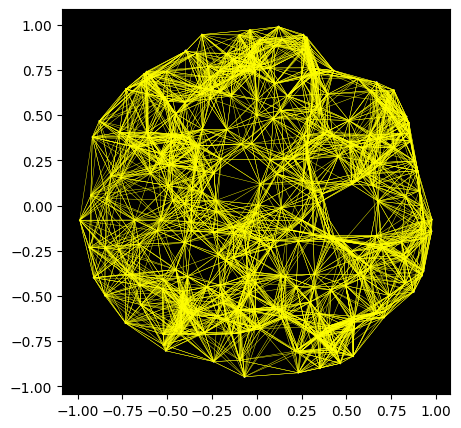

In [91]:
#north
x,y,lum,HIPnum=csv_to_data('../star_data/north.csv')
data = np.column_stack((x,y,lum,HIPnum))
position=np.column_stack((x,y))
edge_dist={}
for i in range(len(data)):
    dist_l=[]
    for j in range(len(data)):
        if i==j:
            continue
        dist=calc_dist(position[i],position[j])
        dist_l.append((dist,HIPnum[j]))
    dist_l.sort(key=lambda x:x[0])
    min_list=dist_l[:20]
    min_point=[]
    for j in range(len(min_list)):
        if min_list[j][0]<0.5:
            min_point.append(min_list[j][1])
    edge_dist[HIPnum[i]]=min_point

size=7*np.exp(-1*(lum+2)*np.log(2))
fig, ax = plt.subplots(figsize=(5,5))
ax.patch.set_facecolor('black')
ax.scatter(x,y,s=size,color='white')
for key in edge_dist:
    indice1=np.where(HIPnum==key)
    x1,y1,=x[indice1],y[indice1]
    for item in edge_dist[key]:
        indice2=np.where(HIPnum==item)
        x2,y2=x[indice2],y[indice2]
        plt.plot((x1,x2),(y1,y2),linewidth=0.3,color='yellow')

plt.show()
        


        




-1.448892762137335


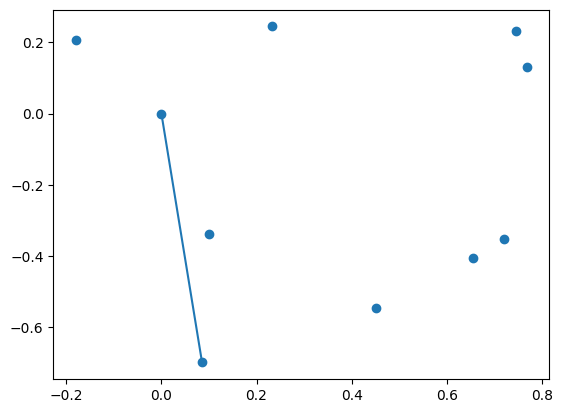

In [103]:
p=10

points = np.random.rand(p, 2)

for i in range(1,p):
    points[i]=points[i]-points[0]

points[0]=np.array([0,0])
norm=np.linalg.norm(points[1])
theta=np.arctan(points[1][1]/points[1][0])
print(theta)
plt.scatter(points[:, 0], points[:, 1])

p1=points[0]
p2=points[1]
plt.plot((p1[0],p2[0]),(p1[1],p2[1]))
plt.show()

In [93]:
dotsize=200
a_x=(-1)*x+1
a_y=y+1

near_dot=[[-1 for _ in range(dotsize)] for _ in range(dotsize)]
near_dist=[[float('inf') for _ in range(dotsize)] for _ in range(dotsize)]

position=np.column_stack((a_x,a_y))
for i in range(dotsize):
    for j in range(dotsize):
        x_dot,y_dot=j/100,i/100
        dot=np.array([x_dot,y_dot])
        for k in range(len(data)):
            dist=calc_dist(dot,position[k])
            if dist<near_dist[i][j]:
                near_dist[i][j]=dist
                near_dot[i][j]=HIPnum[k]

print(near_dot)

            
            



[[104987.0, 104987.0, 104987.0, 104987.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 95501.0, 95501.0, 95501.0, 95501.0, 95501.0, 95501.0, 95501.0, 95501.0, 95501.0, 95501.0, 95501.0, 95501.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 8674

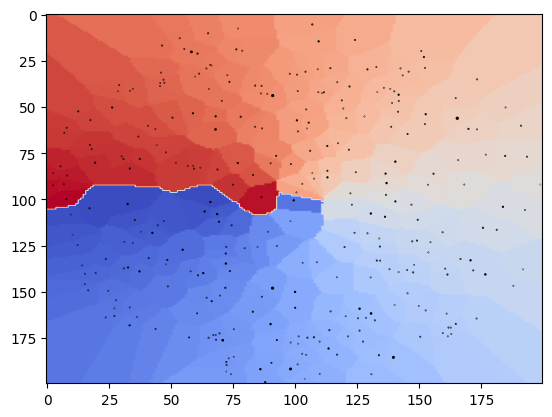

In [94]:
near_dot=np.array(near_dot)
plt.imshow(near_dot, cmap='coolwarm', aspect='auto')
plt.scatter(a_x*100,a_y*100,color='black',s=size)

plt.show()